In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.transforms import RandomRotation, RandomHorizontalFlip, RandomVerticalFlip


In [2]:
model_path = 'tranferlearnig_resnet18.pth'

model1 = models.resnet18(pretrained=False)
num_classes = 276 
model1.fc = nn.Linear(model1.fc.in_features, num_classes)

# Load trạng thái của mô hình từ file đã lưu
model1.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))

# Đặt mô hình vào chế độ đánh giá
model1.eval()


C:\Users\khang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\khang\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
transform = transforms.Compose([
    RandomRotation(degrees=15),
    RandomHorizontalFlip(),
    RandomVerticalFlip(),
    transforms.ToTensor()
])

In [4]:
import matplotlib.pyplot as plt

In [5]:
full_data = datasets.ImageFolder('final_image', transform=transform)

# Chia dữ liệu thành tập huấn luyện và tập kiểm thử
train_size = int(0.8 * len(full_data))
test_size = len(full_data) - train_size

train_data, test_data = torch.utils.data.random_split(full_data, [train_size, test_size], generator=torch.Generator().manual_seed(42))
# Kích thước batch cho DataLoader
batch_size = 16

# DataLoader cho tập huấn luyện
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# DataLoader cho tập kiểm thử
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
# Sử dụng full_data để lấy số lớp
num_classes = len(full_data.classes)

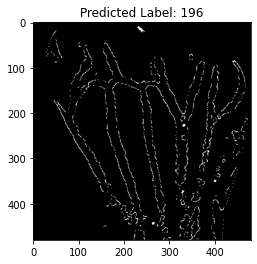

True Label: 196


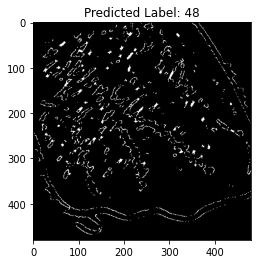

True Label: 48


In [7]:
def predict_image(model, image1, transform):

    image1 = image1.unsqueeze(0)  

    model.eval()

    with torch.no_grad():
        output = model(image1)

    # Lấy nhãn dự đoán
    _, predicted = torch.max(output, 1)
    predicted_class = predicted.item()

    # Hiển thị ảnh và nhãn dự đoán
    image1 = transforms.ToPILImage()(image1.squeeze(0).cpu())
    plt.imshow(image1)
    plt.title(f"Predicted Label: {predicted_class}")
    plt.show()

# DataLoader cho tập kiểm thử với batch size là 1
test_loader = DataLoader(test_data, batch_size=2, shuffle=False)

# Lấy ảnh từ tập kiểm thử
test_image, true_label = next(iter(test_loader))

# Gọi hàm dự đoán và giá trị label thực
predict_image(model1, test_image[0], transform)
print('True Label:', true_label[0].item())
#Test trên 1 ảnh nữa
predict_image(model1, test_image[1], transform)
print('True Label:', true_label[1].item())